### 데이터 전처리

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  # 모든 이미지를 1/255로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./datasets/train"
validation_dir = './datasets/validation'

train_generator = train_datagen.flow_from_directory ( \
        train_dir,# 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지를 150 × 150 크기
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(\
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


제너레이터의 출력:  150 × 150  RGB<br/>
이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)<br/>
각 배치에는 20개의 샘플(배치 크기)

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


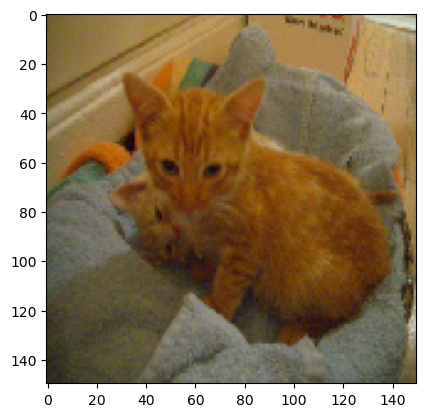

In [2]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

import matplotlib.pyplot as plt
plt.imshow(  train_generator[0][0][0] )
plt.show()

In [6]:
from k_cnn_n_cat_dog_model import makeModel
from tensorflow.keras.models import load_model

model =  makeModel()

import os 
if os.path.exists("k_model.h5") :
    model = load_model("k_model.h5")  
    
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs =15,
      validation_data=validation_generator,
      validation_steps=50)

model.save_weights("k_model.h5") 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 17, 17, 128)      

None
Epoch 1/15


C:\Users\admin\AppData\Local\Temp\ipykernel_18392\1332377190.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 35s 340ms/step - loss: 0.7176 - acc: 0.5065 - val_loss: 0.6930 - val_acc: 0.5100
Epoch 2/15
100/100 [==============================] - 32s 316ms/step - loss: 0.6915 - acc: 0.5375 - val_loss: 0.6829 - val_acc: 0.5550
Epoch 3/15
100/100 [==============================] - 31s 315ms/step - loss: 0.6603 - acc: 0.5930 - val_loss: 0.6300 - val_acc: 0.6470
Epoch 4/15
100/100 [==============================] - 32s 318ms/step - loss: 0.6122 - acc: 0.6610 - val_loss: 0.6066 - val_acc: 0.6620
Epoch 5/15
100/100 [==============================] - 31s 313ms/step - loss: 0.5941 - acc: 0.6760 - val_loss: 0.6164 - val_acc: 0.6500
Epoch 6/15
100/100 [==============================] - 32s 316ms/step - loss: 0.5547 - acc: 0.7300 - val_loss: 0.5840 - val_acc: 0.6920
Epoch 7/15
100/100 [==============================] - 32s 317ms/step - loss: 0.5123 - acc: 0.7455 - val_loss: 0.5498 - val_acc: 0.7140
Epoch 8/15
100/100 [==============================] - 32s 322ms/st

### 학습 결과 정확도 및 비용 그래프

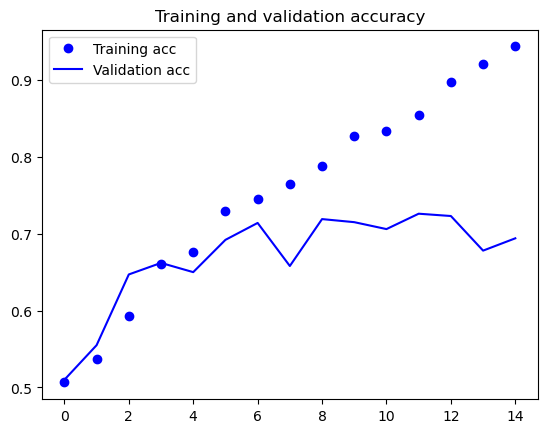

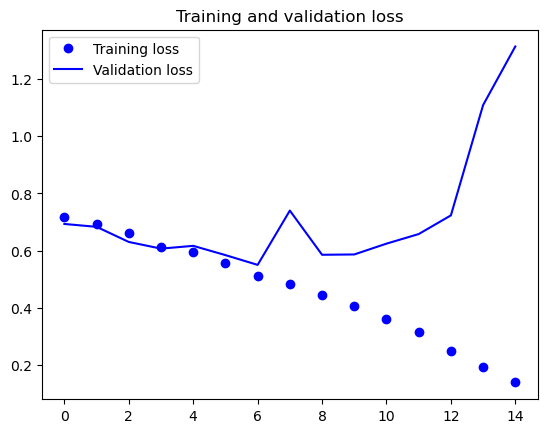

In [7]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 123ms/step
[[5.0980898e-08]]


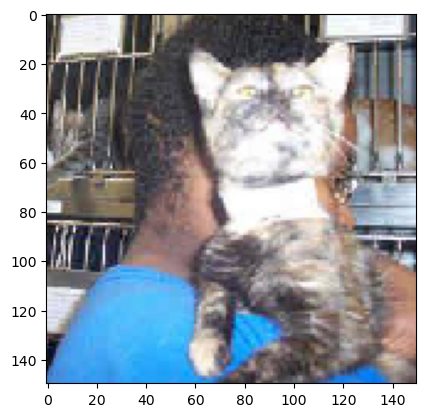

In [8]:
import matplotlib.pyplot as plt 
print( model.predict( train_generator[10][0][0].reshape(-1,150,150,3) ))
plt.imshow(  train_generator[10][0][0]  )
plt.show()